In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.config.experimental_run_functions_eagerly(True)

Init Plugin
Init Graph Optimizer
Init Kernel
Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [2]:
img_dir = '/Users/adityavs14/Documents/Internship/Pianalytix/COVID/ML_model/data2'

In [3]:
BATCH_SIZE = 128
IMAGE_SIZE = 128
input_shape = (128,128,1)

In [4]:
data_gen = ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              validation_split = 0.2)

In [5]:
train_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=True,
                                        class_mode = "binary",
                                        subset = "training")

Found 6752 images belonging to 2 classes.


In [6]:
val_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=True,
                                        class_mode = "binary",
                                        subset = "validation")

Found 1687 images belonging to 2 classes.


In [7]:
labels = train_gen.class_indices
classes = list(labels.keys())

print(classes)

['COVID-19', 'Non-COVID-19']


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D ,BatchNormalization, Flatten, Dropout

In [9]:

model = Sequential()
model.add(keras.layers.InputLayer(input_shape=input_shape))
model.add(Conv2D(16,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
#model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
#model.add(Dense(4, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

Metal device set to: Apple M1


2023-04-25 05:51:32.718700: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-25 05:51:32.719526: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9

In [12]:
len(train_gen),len(val_gen)

(53, 14)

In [13]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_gen,verbose=1,epochs=10,validation_data=val_gen,steps_per_epoch = len(train_gen),validation_steps = len(val_gen))

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(
2023-04-25 05:52:31.023002: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-25 05:52:31.024515: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10
53/53 [==============================] - 26s 462ms/step - loss: 0.3851 - accuracy: 0.8884 - val_loss: 0.3313 - val_accuracy: 0.8886
Epoch 2/10
53/53 [==============================] - 24s 461ms/step - loss: 0.2825 - accuracy: 0.9012 - val_loss: 0.3021 - val_accuracy: 0.8874
Epoch 3/10
53/53 [==============================] - 24s 459ms/step - loss: 0.2095 - accuracy: 0.9308 - val_loss: 0.3255 - val_accuracy: 0.8975
Epoch 4/10
53/53 [==============================] - 24s 463ms/step - loss: 0.1827 - accuracy: 0.9382 - val_loss: 0.2767 - val_accuracy: 0.9010
Epoch 5/10
53/53 [==============================] - 24s 465ms/step - loss: 0.1475 - accuracy: 0.9492 - val_loss: 0.2650 - val_accuracy: 0.9052
Epoch 6/10
53/53 [==============================] - 24s 462ms/step - loss: 0.1205 - accuracy: 0.9590 - val_loss: 0.2475 - val_accuracy: 0.9312
Epoch 7/10
53/53 [==============================] - 24s 461ms/step - loss: 0.1105 - accuracy: 0.9669 - val_loss: 0.2837 - val_accuracy: 0.9046

<AxesSubplot:>

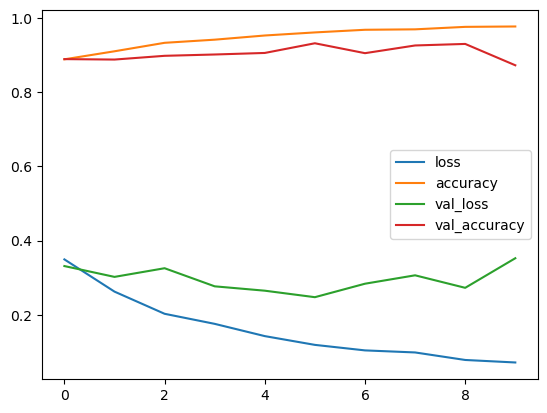

In [14]:
pd.DataFrame(history.history).plot()

In [15]:
model.save('CovidTest.h5')

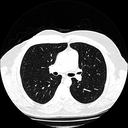

No COVID detected


In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps


data = np.ndarray(shape=(1,128, 128, 1), dtype=np.float32)
#image = Image.open(f'/Users/adityavs14/Documents/Internship/Pianalytix/COVID/ML_model/data2/COVID-19/COVID-19_0231.png')
image = Image.open(f'/Users/adityavs14/Documents/Internship/Pianalytix/COVID/ML_model/data2/Non-COVID-19/Non-COVID-19_251.png')
size = (128, 128)
image = ImageOps.grayscale(image)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
display(image)

data = image_array.reshape((-1,128,128,1))/255

prediction = np.round(model.predict(data)[0][0])
if prediction == 0:
    print('COVID detected')
else:
    print('No COVID detected')


 